- 프로젝트(전환예측모델)
    - OO온라인교육은 10일간 무료체험 서비스를 제공하고 있다. M월 한달간 발생한 무료체험자들의 온라인 학습활동 데이터를 활용하여 무료체험자들의 유료회원 전환 가능성을 예측하는 모델을 개발해보자.

#### 1. Logistics Regression
- Y(종속변수)가 Binary(True or False)
    - 변수의 유형: Continuous vs Categorical
    - 독립변수 vs 종속변수

| 독립변수      | 종속변수 | 예시    |
| :----:       |    :----:   |   :----:|
| Continuous      | Continuous       | 연간 쇼핑몰 방문횟수 -> 연간 구매액  |
| Continuous   | Categorical        | 연간 쇼핑몰 방문횟수 -> 탈퇴여부   |
| Categorical   | Continuous        | 쇼핑몰 회원 주소 -> 연간 구매액      |
| Categorical   | Categorical        | 쇼핑몰 회원 주소 -> 탈퇴여부      |
- 참 쉽죠?
    - 각자 4가지 유형별로 하나씩 예시를 제시해보세요! <p>

- Logistics Regression: 종속변수가 Categorical, 특히, Binary 일 때 사용하는 가장 기초적이고 인기있는 ML 모델중 하나
- 실무에서 인기 많음
    - IBM: https://www.ibm.com/topics/logistic-regression <p>

- 개념 강좌 추천:
    - StatQuest의 LR 플레이리스트(7개 영상): https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe, 처음 2개 영상은 강추
    - 김성범의 [핵심 머신러닝] 로지스틱회귀모델 1 (로지스틱함수, 승산): https://www.youtube.com/watch?v=l_8XEj2_9rk, Part2 영상도 있음

#### 2. Logistics Regression 모델링 예제1
- 예제출처: "Linear Regression vs. Logistic Regression" by Amit Chauhan, https://pub.towardsai.net/machine-learning-fcf74f121167 (일부 추가 변형함)
- 데이터출처1: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression?resource=download
- 데이터출처2: https://www.kaggle.com/datasets/mdwasimakhtar03/social-network-adscsv?select=Social_Network_Ads.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
datafile = pd.read_csv("C:/Users/rltmdals/Downloads/Salary_Data.csv")
datafile.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


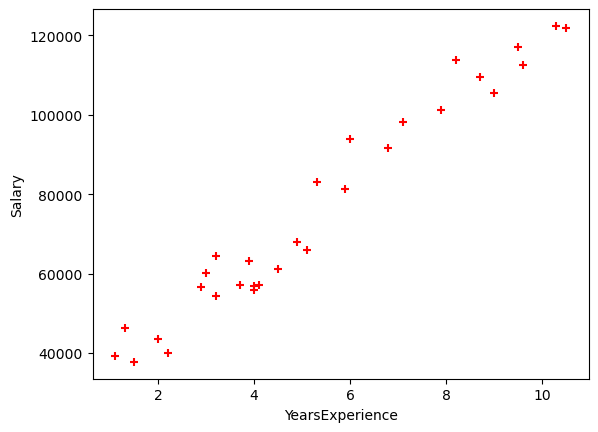

In [5]:
# scatter plot

x=datafile['YearsExperience']
y=datafile['Salary']
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(x,y,color='red',marker='+')
plt.show()

In [7]:
# sklearn 을 활용한 선형회귀 모델링을 위해
# 데이터를 training set 과 test set으로 분리한다 (매우 중요한 개념!)
# 예시는 값을 어레이로 변경해서 진행했으나, 다양한 방식이 존재한다.

import sklearn
from sklearn.model_selection import train_test_split

x=datafile.iloc[:,:-1].values
y=datafile.iloc[:,1].values

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=1)

In [8]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
# 선형 모델링

from sklearn.linear_model import LinearRegression
model=LinearRegression()   #y=ax+b
model.fit(xtrain,ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#prediction
y_pred=model.predict(xtest)
y_pred

array([ 74675.37776747,  91160.02832519,  61853.98288925,  81086.07520659,
        67348.86640849,  88412.58656557, 113139.56240215,  44453.51841166,
       105813.05104316,  98486.53968418])

In [11]:
# See how it works well
test_result = pd.DataFrame(list(zip(ytest, y_pred)), columns = ['y_actual', 'y_predict'])
test_result['diff(%)'] = (test_result['y_actual']-test_result['y_predict'])/test_result['y_actual']
test_result

,y_actual,y_predict,diff(%)
0,83088.0,74675.377767,0.101250
1,98273.0,91160.028325,0.072380
2,63218.0,61853.982889,0.021576
3,93940.0,81086.075207,0.136831
4,61111.0,67348.866408,-0.102074
5,91738.0,88412.586566,0.036249
6,116969.0,113139.562402,0.032739
7,43525.0,44453.518412,-0.021333
8,109431.0,105813.051043,0.033061
9,101302.0,98486.539684,0.027793


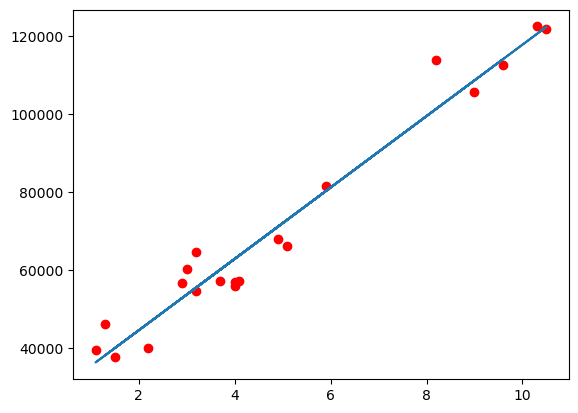

In [12]:
# plot

plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,model.predict(xtrain))
plt.show()

##### 2.2 Logistics Regression
- 데이터셋 출처: https://www.kaggle.com/datasets/mdwasimakhtar03/social-network-adscsv

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
datafile=pd.read_csv("C:/Users/rltmdals/Downloads/Social_Network_Ads.csv")
datafile.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<AxesSubplot:xlabel='Age', ylabel='Purchased'>

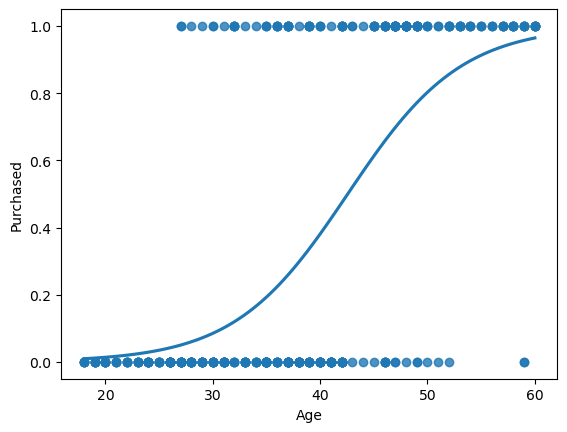

In [17]:
# plot logistics curve
 
import seaborn as sns
sns.regplot(x=datafile['Age'], y=datafile['Purchased'], logistic=True, ci=None)

In [30]:
#training and testing data
from sklearn.model_selection import train_test_split

X=datafile.iloc[:,[0,1]].values
Y=datafile.iloc[:,2].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [31]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [32]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [19]:
from sklearn.linear_model import LogisticRegression
classifer=LogisticRegression(random_state=0)
classifer.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [20]:
Y_pred=classifer.predict(X_test)

In [40]:
test_result = pd.DataFrame(list(zip(X_test, Y_train, Y_pred)), columns = ['X', 'y_actual', 'y_predict']) 
#대소문자주의: 위 선형에서 소문자로 시작
test_result['Comp.'] = (test_result['y_actual']==test_result['y_predict'])
test_result
# X는 그냥 확인용, 뭘 넣었는지 모름

,X,y_actual,y_predict,Comp.
0,"[30, 87000]",0,0,True
1,"[38, 50000]",1,0,False
2,"[35, 75000]",0,0,True
3,"[30, 79000]",1,0,False
4,"[35, 50000]",1,0,False
...,...,...,...,...
95,"[27, 96000]",0,0,True
96,"[23, 63000]",0,0,True
97,"[48, 33000]",0,0,True
98,"[48, 90000]",0,1,False


In [41]:
# Confusion matrix.
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.68

In [24]:
# 데이터를 정규화하여 다시 실행하여 정확도를 비교해보자!
# min - max 스케일링 등 다양한 feature engineering 기법을 테스트해보자

In [25]:
# 데이터를 정규화한다. 
# 데이터들이 평균은 0, 표준편차는 1이 되도록 변경하는 작업이다.

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [42]:
# from sklearn.linear_model import LogisticRegression
# 모델 재훈련
classifer=LogisticRegression(random_state=0)
classifer.fit(X_train,Y_train)

# 재예측
Y_pred=classifer.predict(X_test)

# Confusion Matrix 재평가
#from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[68,  0],
       [32,  0]], dtype=int64)

In [27]:
# 재평가
#from sklearn.metrics import accuracy_score
#from 
accuracy_score(Y_test,Y_pred)

0.89

In [29]:
# 최종 모델의 (계수, Coefficients) 를 확인하고 싶으면 아래와 같이 .coef_ 의 값을 확인한다. 단, sklearn 모델은 p-value를 제공하지 않아,
# 다른 통계 라이브러리로 확인해야한다.
# 처음이 age, 두번째가 salary 변수의 [_____]
classifer.coef_

array([[2.07669377, 1.1102991 ]])